In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-five-personality-test/IPIP-FFM-data-8Nov2018/codebook.txt
/kaggle/input/big-five-personality-test/IPIP-FFM-data-8Nov2018/data-final.csv
/kaggle/input/big-five-personality-test/IPIP-FFM-data-8Nov2018/.directory


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("../input/big-five-personality-test/IPIP-FFM-data-8Nov2018/data-final.csv", sep = "\t")
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [4]:
data.shape, data['country'].unique(), data['country'].nunique()

((1015341, 110),
 array(['GB', 'MY', 'KE', 'SE', 'US', 'FI', 'UA', 'PH', 'FR', 'AU', 'IN',
        'CA', 'NL', 'ZA', 'HK', 'BR', 'CH', 'TH', 'IT', 'ES', 'AE', 'HR',
        'GR', 'IE', 'OM', 'DE', 'PT', 'SG', 'NONE', 'RO', 'NO', 'BD', 'BN',
        'NG', 'LT', 'ET', 'ID', 'BE', 'AT', 'DK', 'TZ', 'LU', 'PL', 'JP',
        'MX', 'CY', 'UG', 'LK', 'TR', 'MM', 'CO', 'EE', 'AR', 'IS', 'HU',
        'PR', 'PK', 'TN', 'LV', 'CZ', 'NZ', 'RS', 'IL', 'JM', 'CL', 'QA',
        'SA', 'VN', 'KZ', 'BA', 'MU', 'EG', 'PE', nan, 'SI', 'JO', 'TW',
        'DO', 'DZ', 'KW', 'MA', 'MT', 'TT', 'BS', 'VE', 'RU', 'KR', 'LR',
        'GT', 'BG', 'IM', 'GH', 'SO', 'SK', 'MV', 'CN', 'AZ', 'AL', 'KH',
        'LB', 'UY', 'ZW', 'UZ', 'HN', 'CR', 'GE', 'GI', 'MO', 'NP', 'IR',
        'MK', 'MN', 'ZM', 'NI', 'BH', 'SD', 'BZ', 'GD', 'KY', 'BB', 'CI',
        'PG', 'AG', 'VI', 'PY', 'PA', 'SZ', 'SV', 'ME', 'BM', 'AO', 'KG',
        'FJ', 'VC', 'AF', 'RW', 'GG', 'BY', 'GP', 'AX', 'LY', 'JE', 'MP',
        'SY', 'PS', 

**1015341 number of entries are part of this dataset and people in 223 different regions are aware of Big Five Personality Test.**

In [5]:
Missing = pd.DataFrame(round(100*(data.isnull().sum()/len(data.index)), 5))
Missing = Missing.sort_values(0,ascending=False)
Missing

,0
introelapse,0.20348
screenh,0.20348
screenw,0.20348
EXT1,0.17561
EST6_E,0.17561
...,...
dateload,0.00000
endelapse,0.00000
IPC,0.00000
lat_appx_lots_of_err,0.00000


In [6]:
Missing[Missing[0]>0]

,0
introelapse,0.20348
screenh,0.20348
screenw,0.20348
EXT1,0.17561
EST6_E,0.17561
...,...
CSN5,0.17561
CSN6,0.17561
CSN7,0.17561
CSN8,0.17561


In [7]:
data.dropna(axis=0, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012050 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 857.1+ MB


In [9]:
list(data.columns)

['EXT1',
 'EXT2',
 'EXT3',
 'EXT4',
 'EXT5',
 'EXT6',
 'EXT7',
 'EXT8',
 'EXT9',
 'EXT10',
 'EST1',
 'EST2',
 'EST3',
 'EST4',
 'EST5',
 'EST6',
 'EST7',
 'EST8',
 'EST9',
 'EST10',
 'AGR1',
 'AGR2',
 'AGR3',
 'AGR4',
 'AGR5',
 'AGR6',
 'AGR7',
 'AGR8',
 'AGR9',
 'AGR10',
 'CSN1',
 'CSN2',
 'CSN3',
 'CSN4',
 'CSN5',
 'CSN6',
 'CSN7',
 'CSN8',
 'CSN9',
 'CSN10',
 'OPN1',
 'OPN2',
 'OPN3',
 'OPN4',
 'OPN5',
 'OPN6',
 'OPN7',
 'OPN8',
 'OPN9',
 'OPN10',
 'EXT1_E',
 'EXT2_E',
 'EXT3_E',
 'EXT4_E',
 'EXT5_E',
 'EXT6_E',
 'EXT7_E',
 'EXT8_E',
 'EXT9_E',
 'EXT10_E',
 'EST1_E',
 'EST2_E',
 'EST3_E',
 'EST4_E',
 'EST5_E',
 'EST6_E',
 'EST7_E',
 'EST8_E',
 'EST9_E',
 'EST10_E',
 'AGR1_E',
 'AGR2_E',
 'AGR3_E',
 'AGR4_E',
 'AGR5_E',
 'AGR6_E',
 'AGR7_E',
 'AGR8_E',
 'AGR9_E',
 'AGR10_E',
 'CSN1_E',
 'CSN2_E',
 'CSN3_E',
 'CSN4_E',
 'CSN5_E',
 'CSN6_E',
 'CSN7_E',
 'CSN8_E',
 'CSN9_E',
 'CSN10_E',
 'OPN1_E',
 'OPN2_E',
 'OPN3_E',
 'OPN4_E',
 'OPN5_E',
 'OPN6_E',
 'OPN7_E',
 'OPN8_E',
 'OPN9_E',
 '

**Features such as 'dateload','screenw',
 'screenh',
 'introelapse',
 'testelapse',
 'endelapse',
 'IPC',
 'lat_appx_lots_of_err',
 'long_appx_lots_of_err' are not useful in our case, therefore, removing them.**


In [10]:
data.drop(['dateload',
 'screenw',
 'screenh',
 'introelapse',
 'testelapse',
 'endelapse',
 'IPC','lat_appx_lots_of_err',
 'long_appx_lots_of_err'], axis=1, inplace=True)

In [11]:
list(data.columns), len(list(data.columns))

(['EXT1',
  'EXT2',
  'EXT3',
  'EXT4',
  'EXT5',
  'EXT6',
  'EXT7',
  'EXT8',
  'EXT9',
  'EXT10',
  'EST1',
  'EST2',
  'EST3',
  'EST4',
  'EST5',
  'EST6',
  'EST7',
  'EST8',
  'EST9',
  'EST10',
  'AGR1',
  'AGR2',
  'AGR3',
  'AGR4',
  'AGR5',
  'AGR6',
  'AGR7',
  'AGR8',
  'AGR9',
  'AGR10',
  'CSN1',
  'CSN2',
  'CSN3',
  'CSN4',
  'CSN5',
  'CSN6',
  'CSN7',
  'CSN8',
  'CSN9',
  'CSN10',
  'OPN1',
  'OPN2',
  'OPN3',
  'OPN4',
  'OPN5',
  'OPN6',
  'OPN7',
  'OPN8',
  'OPN9',
  'OPN10',
  'EXT1_E',
  'EXT2_E',
  'EXT3_E',
  'EXT4_E',
  'EXT5_E',
  'EXT6_E',
  'EXT7_E',
  'EXT8_E',
  'EXT9_E',
  'EXT10_E',
  'EST1_E',
  'EST2_E',
  'EST3_E',
  'EST4_E',
  'EST5_E',
  'EST6_E',
  'EST7_E',
  'EST8_E',
  'EST9_E',
  'EST10_E',
  'AGR1_E',
  'AGR2_E',
  'AGR3_E',
  'AGR4_E',
  'AGR5_E',
  'AGR6_E',
  'AGR7_E',
  'AGR8_E',
  'AGR9_E',
  'AGR10_E',
  'CSN1_E',
  'CSN2_E',
  'CSN3_E',
  'CSN4_E',
  'CSN5_E',
  'CSN6_E',
  'CSN7_E',
  'CSN8_E',
  'CSN9_E',
  'CSN10_E',
  'OPN1_E',

In [12]:
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
count,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,...,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06
mean,2.647892e+00,2.773242e+00,3.288202e+00,3.140699e+00,3.276805e+00,2.401119e+00,2.771527e+00,3.414799e+00,2.963761e+00,3.556569e+00,...,8.244371e+03,1.301929e+04,7.177805e+03,1.329843e+04,6.282261e+03,8.257955e+03,7.691908e+03,5.425333e+03,6.317961e+03,5.338179e+03
std,1.264476e+00,1.323982e+00,1.215083e+00,1.237473e+00,1.277636e+00,1.225812e+00,1.400348e+00,1.271954e+00,1.346053e+00,1.305249e+00,...,9.265927e+05,1.222450e+06,3.764749e+05,3.049880e+06,3.416500e+05,5.646852e+05,5.846318e+05,2.631705e+05,4.300991e+05,4.411506e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.392774e+07,-2.152050e+05,-4.170310e+05,-7.446700e+04,-1.281720e+05,-7.125690e+06,-6.181300e+04,-5.001200e+04,-9.598600e+04,-3.594871e+06
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,...,2.073000e+03,3.053000e+03,1.864000e+03,2.679000e+03,1.976000e+03,2.364000e+03,2.279000e+03,2.144000e+03,2.328000e+03,1.484000e+03
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,3.025000e+03,4.253000e+03,2.751000e+03,3.738000e+03,2.830000e+03,3.337000e+03,3.208000e+03,3.051000e+03,3.269000e+03,2.192000e+03
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,...,4.562000e+03,6.228000e+03,4.281000e+03,5.536000e+03,4.266000e+03,4.944000e+03,4.728000e+03,4.468000e+03,4.784000e+03,3.361000e+03
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,6.750470e+08,1.026126e+09,1.936519e+08,2.147484e+09,1.626808e+08,2.726280e+08,3.891434e+08,1.696693e+08,3.470326e+08,3.344289e+08


In [13]:
!pip install country-converter
!pip install pycountry-convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 77.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 kB 20.8 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=f6c871bebd0d6d3f49a2e02f6177401d30bcbc4c29208871e318bac74fb0b89c
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [14]:
import plotly.graph_objects as go
import plotly.express as px
import country_converter as coco
import pycountry_convert as pycoco

**LOCATION BASED ANALYSIS**

In [15]:
iso2 = list(data["country"].unique())

unknown_iso2 = ["NONE", "SX", "TL", "AQ"]

iso3 = coco.convert(names = iso2, to = "ISO3")
continent = pd.Series(iso2)[~pd.Series(iso2).isin(unknown_iso2)].apply(lambda x: pycoco.country_alpha2_to_continent_code(x))
short_name = coco.convert(names = iso2, to = "name_short")

dict_continent_name = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Oceania',
    'EU': 'Europe',
    'AF': 'Africa'
}

continent = continent.replace(dict_continent_name)
dict_country = dict(zip(iso2, iso3))
dict_short_name = dict(zip(iso3, short_name))
dict_continent = dict(zip(iso2, continent))

data["country_iso2"] = data["country"].replace(dict_country)
data["country_iso3"] = data["country"].replace(dict_country)
data["country_name"] = data["country_iso3"].replace(dict_short_name)
data["continent"] = data["country"].replace(dict_continent)

In [16]:
country_table = data["country_iso3"].value_counts()
country_table = country_table.to_frame("count")
country_table["country_iso3"] = country_table.index
country_table["country_name"] = country_table["country_iso3"].replace(dict_short_name)
country_table["hover_text"] = country_table["country_name"] + '<br>' + \
    country_table["count"].apply("{:,}".format) + " obs."
print(country_table)


      count country_iso3       country_name                     hover_text
USA  545414          USA      United States  United States<br>545,414 obs.
GBR   66373          GBR     United Kingdom  United Kingdom<br>66,373 obs.
CAN   61751          CAN             Canada          Canada<br>61,751 obs.
AUS   49595          AUS          Australia       Australia<br>49,595 obs.
PHL   19839          PHL        Philippines     Philippines<br>19,839 obs.
..      ...          ...                ...                            ...
MAF       1          MAF       Saint-Martin         Saint-Martin<br>1 obs.
GNQ       1          GNQ  Equatorial Guinea    Equatorial Guinea<br>1 obs.
FLK       1          FLK   Falkland Islands     Falkland Islands<br>1 obs.
MHL       1          MHL   Marshall Islands     Marshall Islands<br>1 obs.
SHN       1          SHN         St. Helena           St. Helena<br>1 obs.

[223 rows x 4 columns]


In [17]:
fig = go.Figure(data = go.Choropleth(
    locations = country_table.index,
    z = np.log(country_table["count"]),
    text = country_table["hover_text"],
    showscale = True,
    colorscale = "Blues",
    hoverinfo = "text",
    marker_line_color = "black"
))

fig.update_layout(title = "Awareness count per country")
fig.show()

**US stands out with the awareness count of 545414.**



* openness to experience (inventive/curious vs. consistent/cautious)

* conscientiousness (efficient/organized vs. extravagant/careless)

* extraversion (outgoing/energetic vs. solitary/reserved)

* agreeableness (friendly/compassionate vs. critical/rational)

* neuroticism (sensitive/nervous vs. resilient/confident)

In [19]:
ext = ['EXT1','EXT3','EXT5','EXT7','EXT9']
ınt = ['EXT2','EXT4','EXT6','EXT6','EXT10']
opn = ['OPN3','OPN5','OPN7','OPN8','OPN9','OPN10']
exp = ['OPN1','OPN2','OPN4','OPN6']
agr = ['AGR2','AGR4','AGR6','AGR8','AGR10','AGR9']
cpt = ['AGR1','AGR3','AGR5','AGR7']
csn = ['CSN1','CSN3','CSN5','CSN7','CSN9','CSN10']
spt = ['CSN2','CSN4','CSN6','CSN8']
est = ['EST2','EST4','EST5','EST6']
nrt = ['EST1','EST3','EST7','EST8','EST9','EST10']


data['extroversion_score'] = data[ext].sum(axis=1)
data['introversion_score'] = data[ınt].sum(axis=1)
data['open_score'] = data[opn].sum(axis=1)
data['consistency_score'] = data[exp].sum(axis=1)
data['agreeable_score'] = data[agr].sum(axis=1)
data['competitiveness_score'] = data[cpt].sum(axis=1)
data['conscientious_score'] = data[csn].sum(axis=1)
data['spontaneity_score'] = data[spt].sum(axis=1)
data['emotionally_stable_score'] = data[est].sum(axis=1)
data['neurotic_score'] = data[nrt].sum(axis=1)

In [20]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,extroversion_score,introversion_score,open_score,consistency_score,agreeable_score,competitiveness_score,conscientious_score,spontaneity_score,emotionally_stable_score,neurotic_score
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,23.0,6.0,25.0,8.0,23.0,8.0,20.0,12.0,10.0,14.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,12.0,20.0,21.0,6.0,26.0,6.0,22.0,9.0,8.0,13.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,12.0,16.0,22.0,9.0,23.0,5.0,19.0,9.0,10.0,16.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,11.0,13.0,22.0,9.0,23.0,9.0,14.0,13.0,10.0,17.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,17.0,16.0,28.0,8.0,26.0,4.0,28.0,4.0,10.0,13.0


In [21]:
df = data[['extroversion_score','introversion_score','open_score','consistency_score','agreeable_score','competitiveness_score','conscientious_score','spontaneity_score','emotionally_stable_score','neurotic_score']].copy()

In [26]:
df_new= pd.DataFrame(df)
df_new

,extroversion_score,introversion_score,open_score,consistency_score,agreeable_score,competitiveness_score,conscientious_score,spontaneity_score,emotionally_stable_score,neurotic_score
0,23.0,6.0,25.0,8.0,23.0,8.0,20.0,12.0,10.0,14.0
1,12.0,20.0,21.0,6.0,26.0,6.0,22.0,9.0,8.0,13.0
2,12.0,16.0,22.0,9.0,23.0,5.0,19.0,9.0,10.0,16.0
3,11.0,13.0,22.0,9.0,23.0,9.0,14.0,13.0,10.0,17.0
4,17.0,16.0,28.0,8.0,26.0,4.0,28.0,4.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...
1015336,18.0,14.0,20.0,9.0,25.0,11.0,19.0,12.0,13.0,20.0
1015337,18.0,15.0,26.0,7.0,24.0,9.0,16.0,12.0,14.0,26.0
1015338,21.0,11.0,28.0,8.0,23.0,12.0,14.0,19.0,9.0,18.0
1015339,10.0,16.0,24.0,11.0,22.0,9.0,22.0,8.0,13.0,20.0


In [27]:
df_new.corr()

,extroversion_score,introversion_score,open_score,consistency_score,agreeable_score,competitiveness_score,conscientious_score,spontaneity_score,emotionally_stable_score,neurotic_score
extroversion_score,1.000000,-0.654403,0.195833,-0.013940,0.369275,-0.174545,0.129251,-0.017855,0.098378,-0.176330
introversion_score,-0.654403,1.000000,-0.103738,0.157606,-0.183681,0.264790,0.006834,0.101999,0.095606,0.215834
open_score,0.195833,-0.103738,1.000000,-0.230730,0.214975,0.007019,0.225812,0.080203,0.049329,0.056742
consistency_score,-0.013940,0.157606,-0.230730,1.000000,-0.019081,0.173595,0.085148,0.076368,0.181636,0.145329
agreeable_score,0.369275,-0.183681,0.214975,-0.019081,1.000000,-0.566912,0.219430,0.005020,0.135198,0.068316
competitiveness_score,-0.174545,0.264790,0.007019,0.173595,-0.566912,1.000000,-0.073289,0.182821,0.134237,0.150477
conscientious_score,0.129251,0.006834,0.225812,0.085148,0.219430,-0.073289,1.000000,-0.502488,0.045324,-0.059116
spontaneity_score,-0.017855,0.101999,0.080203,0.076368,0.005020,0.182821,-0.502488,1.000000,0.184768,0.343917
emotionally_stable_score,0.098378,0.095606,0.049329,0.181636,0.135198,0.134237,0.045324,0.184768,1.000000,0.204919
neurotic_score,-0.176330,0.215834,0.056742,0.145329,0.068316,0.150477,-0.059116,0.343917,0.204919,1.000000


<AxesSubplot: >

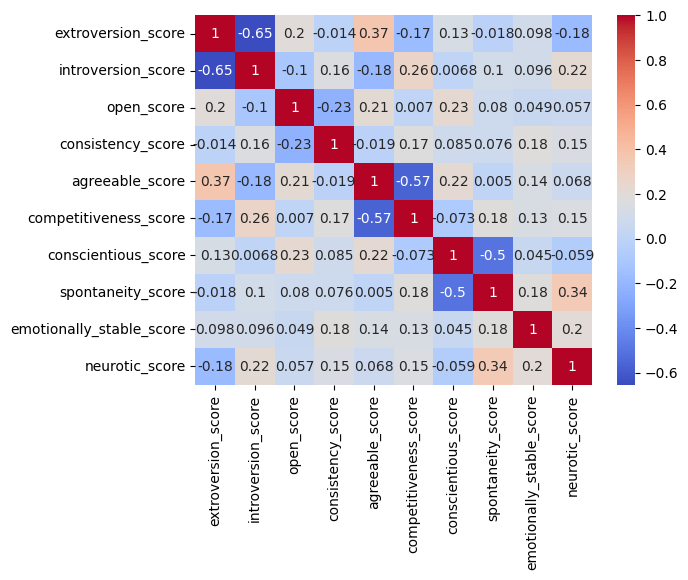

In [29]:
sns.heatmap(df_new.corr(),cmap='coolwarm',annot=True)

**This represents the relation between each and every personality type.**